# Exploratory Data Analysis (EDA)

This notebook explores business performance, customer demand, inventory
behavior, and shipping performance to identify patterns, trends, and
potential supply chain inefficiencies.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv("../data/processed/orders_features.csv")
inventory = pd.read_csv("../data/processed/inventory_features.csv")

orders["order_date"] = pd.to_datetime(orders["order_date"])


In [20]:
total_net_sales = orders["net_sales"].sum()
total_profit = orders["Profit"].sum()

total_net_sales, total_profit


(np.float64(4314681.109999999), np.int64(3266361))

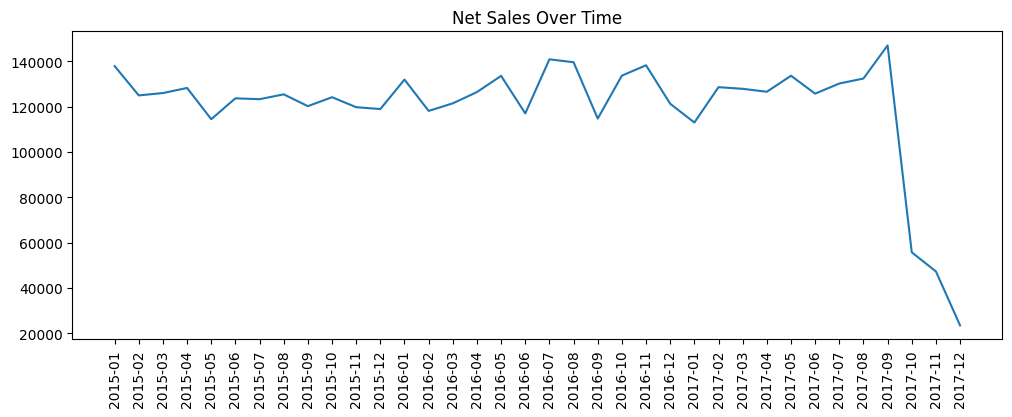

In [21]:
sales_trend = (
    orders
    .groupby("order_year_month")["net_sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,4))
plt.plot(sales_trend["order_year_month"], sales_trend["net_sales"])
plt.xticks(rotation=90)
plt.title("Net Sales Over Time")
plt.show()


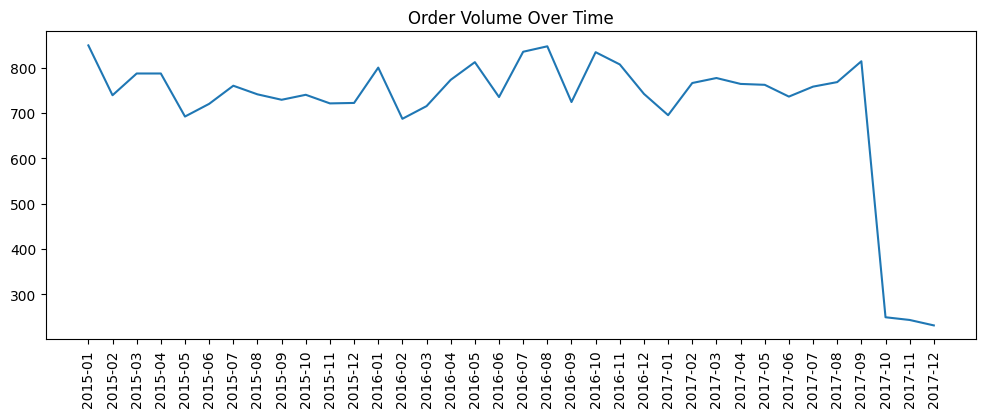

In [22]:
order_count = (
    orders
    .groupby("order_year_month")
    .size()
    .reset_index(name="orders")
)

plt.figure(figsize=(12,4))
plt.plot(order_count["order_year_month"], order_count["orders"])
plt.xticks(rotation=90)
plt.title("Order Volume Over Time")
plt.show()


In [23]:
dept_sales = (
    orders
    .groupby("Product Department")["net_sales"]
    .sum()
    .sort_values(ascending=False)
)

dept_sales.head(10)


Product Department
Fan Shop             2205185.63
Apparel               906243.46
Golf                  603295.85
Footwear              337321.68
Outdoors              147058.15
Technology             53439.55
Fitness                39641.07
Discs Shop             12800.32
Health and Beauty       4767.11
Pet Shop                3698.52
Name: net_sales, dtype: float64

In [25]:
inventory.groupby("Product Name")["storage_cost"].sum().sort_values(ascending=False).head(10)


Product Name
Perfect Fitness Perfect Rip Deck                 18517.71657
Nike Men's Dri-FIT Victory Golf Polo             14407.05544
O'Brien Men's Neoprene Life Vest                 11989.77649
Nike Men's Free 5.0+ Running Shoe                 7035.71463
Under Armour Girls' Toddler Spine Surge Runni     5366.52594
Nike Men's CJ Elite 2 TD Football Cleat           4668.37858
Field & Stream Sportsman 16 Gun Fire Safe         3610.53087
Pelican Sunstream 100 Kayak                       3142.51251
Diamondback Women's Serene Classic Comfort Bi     2741.73878
Bowflex SelectTech 1090 Dumbbells                 1219.31032
Name: storage_cost, dtype: float64

In [26]:
orders["late_shipment"].mean()


np.float64(0.4318085147519431)

In [27]:
orders.groupby("Shipment Mode")["late_shipment"].mean().sort_values(ascending=False)


Shipment Mode
First Class       0.974484
Second Class      0.593160
Standard Class    0.255792
Same Day          0.181319
Name: late_shipment, dtype: float64

In [28]:
inventory["inventory_coverage_months"].describe()


count    4025.000000
mean        0.460060
std         0.891904
min         0.000000
25%         0.000000
50%         0.000000
75%         0.549618
max        13.537190
Name: inventory_coverage_months, dtype: float64

In [29]:
inventory[
    (inventory["avg_monthly_demand"].isna()) |
    (inventory["avg_monthly_demand"] == 0)
][["Product Name", "Warehouse Inventory", "storage_cost"]].head()


,Product Name,Warehouse Inventory,storage_cost
56,Dell Laptop,14,21.89166
114,SOLE E35 Elliptical,1,0.36106
115,Bushnell Pro X7 Jolt Slope Rangefinder,9,20.04156
116,SOLE E25 Elliptical,23,42.38831
117,Bowflex SelectTech 1090 Dumbbells,36,53.79516


## Key EDA Findings

- Net sales and order volume remained stable until a sharp decline in late 2017.
- Revenue decline was driven primarily by a reduction in order volume.
- A small number of product departments contributed the majority of net sales.
- Inventory remained high even during demand decline, indicating overstocking.
- Late shipment rate remained consistently high across shipping modes.
